## Setup Environment

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Import and Format Data

In [44]:
FILENAME = 'DST Scoring 2020.xlsx'
SHEET1 = 'Sacks, TFL, Yrds and Points'
SHEET2 = 'Defensive Touchdowns'
SHEET3 = 'Kicking and Punting'

df1 = pd.read_excel(FILENAME, sheet_name=SHEET1)
df2 = pd.read_excel(FILENAME, sheet_name=SHEET2)
df3 = pd.read_excel(FILENAME, sheet_name=SHEET3)

dst_scores = pd.read_csv('FantasyPros_Fantasy_Football_Points_DST.csv')

In [45]:
df1.head()

,Tm,Sk,QBHits,TFL,Int,G,TD,Gms,TotPts,RushYds,PassYds,TotYds
0,Arizona Cardinals,48,100,88,11,16,26,16,367,2008,3623,5631
1,Atlanta Falcons,29,92,63,12,16,34,16,414,1677,4697,6374
2,Baltimore Ravens,39,116,71,10,16,22,16,303,1740,3536,5276
3,Buffalo Bills,38,92,72,15,16,23,16,375,1914,3726,5640
4,Carolina Panthers,29,89,55,7,16,28,16,402,1936,3825,5761


In [46]:
df2.head()

,TEAM,SEASON,GP,INT,INT TD,FF,FR,FR TD
0,Chicago Bears,2020,16,10,0,15,8,1
1,Arizona Cardinals,2020,16,11,0,15,10,0
2,Green Bay Packers,2020,16,11,1,12,7,1
3,New York Giants,2020,16,11,1,14,11,1
4,Detroit Lions,2020,16,7,0,15,5,0


In [47]:
df3.columns = ['Team', 'Team Name', 'KRet Avg', 'KRet Ret', 'KRet Yds', 'KRet TD', 'KRet 20+', 'KRet40+',
       'KRet Lng', 'KRet FC', 'KRet FUM', 'FG Blk', 'XP Blk', 'PRet Avg', 'PRet Ret', 'PRet Yds', 'PRet T',
       'PRet 20+', 'PRet 40+', 'PRet Lng', 'PRet FC', 'PRet FUM', 'P Blk']
df3 = df3[1:]

In [48]:
df3.head()

,Team,Team Name,KRet Avg,KRet Ret,KRet Yds,KRet TD,KRet 20+,KRet40+,KRet Lng,KRet FC,KRet FUM,FG Blk,XP Blk,PRet Avg,PRet Ret,PRet Yds,PRet T,PRet 20+,PRet 40+,PRet Lng,PRet FC,PRet FUM,P Blk
1,Cardinals,Arizona Cardinals,21.9,24,525,0,15,2,54,0,1,0,0,5.4,25,136,0,2,0,24,15,1,2
2,Falcons,Atlanta Falcons,20.5,20,409,0,11,0,29,0,1,0,0,8.9,17,152,0,2,0,24,23,0,0
3,Ravens,Baltimore Ravens,26.7,23,613,1,17,1,93T,0,0,0,0,9,27,244,0,1,0,20,18,0,0
4,Bills,Buffalo Bills,27.6,36,995,0,30,5,60,0,2,0,0,11.9,31,370,1,5,1,84T,13,2,0
5,Panthers,Carolina Panthers,25.3,29,734,0,21,1,98,0,0,0,1,5.9,20,117,0,1,0,20,18,1,0


### Merge Dataframes

In [49]:
df = df1.merge(df2, left_on='Tm', right_on='TEAM')
df = df.merge(df3, left_on='Tm', right_on='Team Name')

In [50]:
df.shape

(32, 43)

In [51]:
df.head()

,Tm,Sk,QBHits,TFL,Int,G,TD,Gms,TotPts,RushYds,PassYds,TotYds,TEAM,SEASON,GP,INT,INT TD,FF,FR,FR TD,Team,Team Name,KRet Avg,KRet Ret,KRet Yds,KRet TD,KRet 20+,KRet40+,KRet Lng,KRet FC,KRet FUM,FG Blk,XP Blk,PRet Avg,PRet Ret,PRet Yds,PRet T,PRet 20+,PRet 40+,PRet Lng,PRet FC,PRet FUM,P Blk
0,Arizona Cardinals,48,100,88,11,16,26,16,367,2008,3623,5631,Arizona Cardinals,2020,16,11,0,15,10,0,Cardinals,Arizona Cardinals,21.9,24,525,0,15,2,54,0,1,0,0,5.4,25,136,0,2,0,24,15,1,2
1,Atlanta Falcons,29,92,63,12,16,34,16,414,1677,4697,6374,Atlanta Falcons,2020,16,12,1,17,9,0,Falcons,Atlanta Falcons,20.5,20,409,0,11,0,29,0,1,0,0,8.9,17,152,0,2,0,24,23,0,0
2,Baltimore Ravens,39,116,71,10,16,22,16,303,1740,3536,5276,Baltimore Ravens,2020,16,10,0,25,12,3,Ravens,Baltimore Ravens,26.7,23,613,1,17,1,93T,0,0,0,0,9,27,244,0,1,0,20,18,0,0
3,Buffalo Bills,38,92,72,15,16,23,16,375,1914,3726,5640,Buffalo Bills,2020,16,15,2,15,11,1,Bills,Buffalo Bills,27.6,36,995,0,30,5,60,0,2,0,0,11.9,31,370,1,5,1,84T,13,2,0
4,Carolina Panthers,29,89,55,7,16,28,16,402,1936,3825,5761,Carolina Panthers,2020,16,7,0,14,15,3,Panthers,Carolina Panthers,25.3,29,734,0,21,1,98,0,0,0,1,5.9,20,117,0,1,0,20,18,1,0


In [52]:
df.columns

Index(['Tm', 'Sk', 'QBHits', 'TFL', 'Int', 'G', 'TD', 'Gms', 'TotPts',
       'RushYds', 'PassYds', 'TotYds', 'TEAM', 'SEASON', 'GP', 'INT', 'INT TD',
       'FF', 'FR', 'FR TD', 'Team', 'Team Name', 'KRet Avg', 'KRet Ret',
       'KRet Yds', 'KRet TD', 'KRet 20+', 'KRet40+', 'KRet Lng', 'KRet FC',
       'KRet FUM', 'FG Blk', 'XP Blk', 'PRet Avg', 'PRet Ret', 'PRet Yds',
       'PRet T', 'PRet 20+', 'PRet 40+', 'PRet Lng', 'PRet FC', 'PRet FUM',
       'P Blk'],
      dtype='object')

## Calculate Points per Game

In [263]:
df_per_game = df[[
    'Tm', 'Sk', 'QBHits', 'TFL', 'TotPts','TotYds','INT', 'INT TD',
    'FF', 'FR', 'FR TD','KRet Yds', 'KRet TD','FG Blk', 'XP Blk','PRet Yds', 'P Blk', 'PRet T']]

In [264]:
df_per_game.set_index('Tm', inplace=True)
df_per_game = df_per_game/16

def points_allowed_score(points):
    if points == 0: return 5
    elif points <=6: return 4
    elif points <=13: return 3
    elif points <=17: return 1
    elif points <=27: return 0
    elif points <=34: return -1
    elif points <=45: return -3
    else:return -5

df_per_game['points_allowed_score'] = df_per_game['TotPts'].apply(points_allowed_score)

In [265]:
CURRENT_SCORING = np.array([1, # Sacks
                            0, # QBHits
                            0, # TFL
                            0, # TotPts
                            0, # TotYds
                            2, # INT
                            6, # INT TD
                            0, # FF
                            2, # FR
                            6, # FR TD
                            0, # KRet Yds
                            6, # Kret TD
                            2, # FG Blk
                            2, # XP Blk
                            0, # Pret Yds
                            2, # P Blk
                            6, # PRet TD
                            1  # points allowed score
                           ])

In [266]:
SCORES = np.dot(df_per_game.values, CURRENT_SCORING)
df_per_game["calc_ppg"] = SCORES

## Compare Points per Game

In [267]:
comparison = df_per_game.reset_index()[['Tm','calc_ppg']].merge(dst_scores[["Team","Avg"]], 
                               left_on='Tm',right_on='Team')

comparison.dtypes

Tm           object
calc_ppg     object
Team         object
Avg         float64
dtype: object

In [268]:
comparison['calc_rank'] = comparison['calc_ppg'].rank()
comparison['actual_rank'] = comparison['Avg'].rank()

In [269]:
comparison.calc_ppg = comparison.calc_ppg.astype('float64')

In [270]:
comparison.sort_values(by=['actual_rank']).head()

,Tm,calc_ppg,Team,Avg,calc_rank,actual_rank
10,Detroit Lions,2.8750,Detroit Lions,1.8,2.5,1.0
12,Houston Texans,2.8750,Houston Texans,2.6,2.5,2.0
16,Las Vegas Raiders,2.4375,Las Vegas Raiders,2.7,1.0,3.0
6,Cincinnati Bengals,3.5625,Cincinnati Bengals,2.8,6.0,4.0
14,Jacksonville Jaguars,3.1250,Jacksonville Jaguars,3.6,4.0,5.0


In [424]:
def plot_distributions(distributions, labels=None):
    colors = mcolors.TABLEAU_COLORS
    names = list(colors)
    
    for idx, dist in enumerate(distributions):
        data = dist
        if labels is None:
            label = dist.name
        else:
            label = labels[idx]
        mu, std = norm.fit(data)
        plt.hist(data, density=True, alpha=0, color=colors[names[0]])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2, color=colors[names[0]], label=label)
        names.pop(0)
    plt.legend()
    plt.show()
        

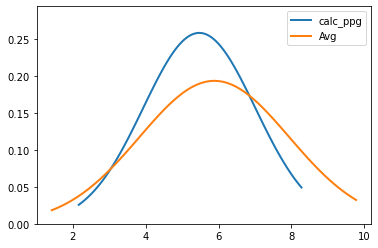

In [425]:
plot_distributions([comparison['calc_ppg'],comparison['Avg']])

In [273]:
"""
Standard scoring:
· Kickoff Return TD = 6pts
· Punt Return TD = 6pts
· Interception Return TD = 6pts
· Fumble Return TD = 6pts
· Blocked Punt or FG return for TD = 6pts
· Each Interception = 2pts
· Each Fumble Recovered = 2pts
· Blocked Punt, PAT or FG = 2pts
· Each Safety = 2pts
· Each Sack = 1pts
· 0 points allowed = 5pts
· 1-6 points allowed = 4pts
· 7-13 points allowed = 3pts
· 14-17 points allowed = 1pts
· 18-27 points allowed = 0pts
· 28-34 points allowed = -1pts
· 35-45 points allowed = -3pts
· 46+ points allowed = -5pts

Custom options:
· Every kickoff return yds
· Every punt return yards
· Every sacks
· Every total tackles
· Interception Return TD
· Fumble Return TD
· Kickoff Return TD
· Punt Return TD
· Blocked Punt or FG return for TD
· Blocked Punt, PAT or FG
· Each Interception
· Each Fumble Recovered
· Each Fumble Forced
· Each Safety
· Each Tackle for Loss
· Passes Defensed
· Every Point Allowed
· 0 points allowed
· 2-6 points allowed
· 7-13 points allowed
· 14-17 points allowed
· 18-21 points allowed
· 22-27 points allowed
· 28-34 points allowed
· 35-45 points allowed
· 46+ points allowed
· Every Yard Allowed
· Less than 100 total yards allowed
· 100-199 total yards allowed
· 200-299 total yards allowed
· 300-349 total yards allowed
· 350-399 total yards allowed
· 400-449 total yards allowed
· 450-499 total yards allowed
· 500-549 total yards allowed
· 550+ total yards allowed
"""

'\nStandard scoring:\n· Kickoff Return TD = 6pts\n· Punt Return TD = 6pts\n· Interception Return TD = 6pts\n· Fumble Return TD = 6pts\n· Blocked Punt or FG return for TD = 6pts\n· Each Interception = 2pts\n· Each Fumble Recovered = 2pts\n· Blocked Punt, PAT or FG = 2pts\n· Each Safety = 2pts\n· Each Sack = 1pts\n· 0 points allowed = 5pts\n· 1-6 points allowed = 4pts\n· 7-13 points allowed = 3pts\n· 14-17 points allowed = 1pts\n· 18-27 points allowed = 0pts\n· 28-34 points allowed = -1pts\n· 35-45 points allowed = -3pts\n· 46+ points allowed = -5pts\n\nCustom options:\n· Every kickoff return yds\n· Every punt return yards\n· Every sacks\n· Every total tackles\n· Interception Return TD\n· Fumble Return TD\n· Kickoff Return TD\n· Punt Return TD\n· Blocked Punt or FG return for TD\n· Blocked Punt, PAT or FG\n· Each Interception\n· Each Fumble Recovered\n· Each Fumble Forced\n· Each Safety\n· Each Tackle for Loss\n· Passes Defensed\n· Every Point Allowed\n· 0 points allowed\n· 2-6 points al

## Scoring Experiment

In [413]:
PROPOSED_SCORING = np.array([
                            3, # Sacks
                            0, # QBHits
                            2, # TFL
                            0, # TotPts
                            -0.02, # TotYds
                            2, # INT
                            6, # INT TD
                            0.5, # FF
                            1.5, # FR
                            6, # FR TD
                            0.01, # KRet Yds
                            6, # Kret TD
                            2, # FG Blk
                            2, # XP Blk
                            0.01, # Pret Yds
                            2, # P Blk
                            6, # PRet TD
                            1  # points allowed score
                           ])

In [414]:
PROPOSED_SCORES = np.dot(df_per_game[[x for x in df_per_game.columns if x not in ['calc_ppg', 'proposed_ppg']]].values, 
                         PROPOSED_SCORING)
df_per_game["proposed_ppg"] = PROPOSED_SCORES

df_per_game["proposed_ppg"] = df_per_game["proposed_ppg"].astype('float64')
df_per_game["calc_ppg"] = df_per_game["calc_ppg"].astype('float64')

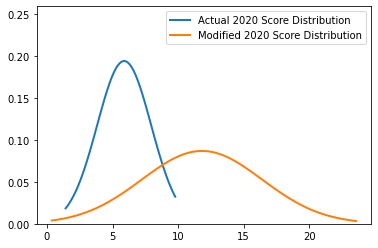

In [426]:
plot_distributions([comparison['Avg'],df_per_game["proposed_ppg"]],
                   labels=["Actual 2020 Score Distribution",
                           "Modified 2020 Score Distribution"])

In [416]:
df_per_game["proposed_ppg"].describe()

count    32.000000
mean     11.817578
std       4.670154
min       4.276250
25%       8.679063
50%      11.476875
75%      15.752344
max      22.525000
Name: proposed_ppg, dtype: float64

In [412]:
comparison['Avg'].describe()

count    32.000000
mean      5.884375
std       2.090240
min       1.800000
25%       4.425000
50%       6.150000
75%       7.325000
max       9.400000
Name: Avg, dtype: float64

In [418]:
df_per_game["proposed_ppg"].sort_values()

Tm
Cincinnati Bengals           4.276250
Jacksonville Jaguars         4.876875
Las Vegas Raiders            5.426875
Minnesota Vikings            5.816875
Detroit Lions                6.081250
Tennessee Titans             6.206875
Houston Texans               7.558750
New England Patriots         8.252500
Dallas Cowboys               8.821250
Atlanta Falcons              8.945625
Los Angeles Chargers         9.052500
Carolina Panthers            9.611875
Kansas City Chiefs           9.808125
New York Jets                9.871875
Denver Broncos              10.968750
San Francisco 49ers         11.335000
Cleveland Browns            11.618750
Chicago Bears               11.716875
Green Bay Packers           11.836250
New York Giants             13.992500
Miami Dolphins              14.341875
Baltimore Ravens            14.784375
Buffalo Bills               14.803125
Seattle Seahawks            15.712500
Indianapolis Colts          15.871875
Arizona Cardinals           16.405625
New Orlea

In [419]:
comparison['Avg'].sort_values()

10    1.8
12    2.6
16    2.7
6     2.8
14    3.6
20    3.8
30    4.1
24    4.2
1     4.5
17    4.6
9     4.6
8     4.8
27    5.5
5     5.6
11    5.9
7     6.1
4     6.2
25    6.3
28    6.4
23    6.4
15    6.6
21    6.6
0     6.8
29    7.3
3     7.4
22    7.8
31    7.9
19    8.8
2     8.8
13    9.1
26    9.3
18    9.4
Name: Avg, dtype: float64